# YOUR PROJECT TITLE

Imports and set magics:

In [96]:
# a. set magic 
%load_ext autoreload
%autoreload 2

# b. load packages 
import numpy as np
from scipy import optimize

# c. packages and settings for plotting
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# d. local modules
from modelproject import OLGModelClass, plot_K, plot_C

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model description

We are very inspired by the OLG from the lectures. Thus we carry the same model forward. This have the followings description.

**Time:** Discrete and indexed by $t\in\{0,1,\dots\}$.

**Demographics:** Population is constant. A life consists of
two periods, *young* and *old*.

**Households:** As young a household supplies labor exogenously, $N_{t}=1$, and earns a after tax wage $(1-\tau_w)w_{t}N_{t}$.<br>
Consumption as young and old are denoted by $C_{1t}$ and $C_{2t+1}$. The after-tax return on saving is $(1-\tau_{r})r_{t+1}$.<br>
Utility is
    
$$
\begin{aligned}
U & =\max_{s_{t}\in[0,1]}\frac{C_{1t}^{1-\sigma}}{1-\sigma}+\beta\frac{C_{2t+1}^{1-\sigma}}{1-\sigma},\,\,\,\beta > -1, \sigma > 0\\
 & \text{s.t.}\\
 & S_{t}=s_{t}(1-\tau_{w})w_{t}N_{t}\\
 & C_{1t}=(1-s_{t})(1-\tau_{w})w_{t}N_{t}\\
 & C_{2t+1}=(1+(1-\tau_{r})r_{t+1})S_{t}
\end{aligned}
$$
    
The problem is formulated in terms of the saving rate $s_t\in[0,1]$.

**Firms:** Firms rent capital $K_{t-1}$ at the rental rate $r_{t}^{K}$,
and hires labor $L_{t}$ at the wage rate $w_{t}$. Firms have access
to the production function
    
$$
\begin{aligned}
Y_{t}=F(K_{t-1},L_{t})=(\alpha K_{t-1}^{-\theta}+(1-\alpha)L_{t}^{-\theta})^{\frac{1}{-\theta}},\,\,\,\theta>-1,\alpha\in(0,1)
\end{aligned}
$$
    
Profits are
    
$$
\begin{aligned}
\Pi_{t}=Y_{t}-w_{t}L_{t}-r_{t}^{K}K_{t-1}
\end{aligned}
$$

**Government:** Choose public consumption, $G_{t}$, and tax rates $\tau_w \in [0,1]$ and $\tau_r \in [0,1]$. Total tax revenue is
    
$$
\begin{aligned}
T_{t} &=\tau_r r_{t} (K_{t-1}+B_{t-1})+\tau_w w_{t}N_{t}   
\end{aligned}
$$
    
Government debt accumulates according to
    
$$
\begin{aligned}
B_{t} &=(1+r^b_{t})B_{t-1}-T_{t}+G_{t} 
\end{aligned}
$$
       
A *balanced budget* implies $G_{t}=T_{t}-r_{t}B_{t-1}$.

**Capital:** Depreciates with a rate of $\delta \in [0,1]$.

**Equilibrium:**

1. Households maximize utility
2. Firms maximize profits
3. No-arbitrage between bonds and capital

    $$
    r_{t}=r_{t}^{K}-\delta=r_{t}^{b}
    $$

4. Labor market clears: $L_{t}=N_{t}=1$
5. Goods market clears: $Y_{t}=C_{1t}+C_{2t}+G_{t}+I_{t}$
6. Asset market clears: $S_{t}=K_{t}+B_{t}$
7. Capital follows its law of motion: $K_{t}=(1-\delta)K_{t-1}+I_{t}$

## Solution and simulation

**Implication of profit maximization:** From FOCs

$$
\begin{aligned}
r_{t}^{k} & =F_{K}(K_{t-1},L_{t})=\alpha K_{t-1}^{-\theta-1}Y_{t}^{1+\theta}\\
w_{t} & =F_{L}(K_{t-1},L_{t})=(1-\alpha)L_{t}^{-\theta-1}Y_{t}^{1+\theta}
\end{aligned}
$$

**Implication of utility maximization:** From FOC

$$
\begin{aligned}
C_{1t}^{-\sigma}=\beta (1+(1-\tau_r)r_{t+1})C_{2t+1}^{-\sigma}
\end{aligned}
$$

**Simulation algorithm:** At the beginning of period $t$, the
economy can be summarized in the state variables $K_{t-1}$ and $B_{t-1}$.<br>

*Before* $s_t$ is known, we can calculate:

$$
\begin{aligned}
Y_{t} & =F(K_{t-1},1)\\
r_{t}^{k} & =F_{K}(K_{t-1},1)\\
w_{t} & =F_{L}(K_{t-1},1)\\
r_{t} & =r^k_{t}-\delta\\
r_{t}^{b} & =r_{t}\\
\tilde{r}_{t} & =(1-\tau_{r})r_{t}\\
C_{2t} & =(1+\tilde{r}_{t})(K_{t-1}+B_{t-1})\\
T_{t} & =\tau_{r}r_{t}(K_{t-1}+B_{t-1})+\tau_{w}w_{t}\\
B_{t} & =(1+r^b_{t})B_{t-1}+T_{t}-G_{t}\\
\end{aligned}
$$

*After* $s_t$ is known we can calculate:

$$
\begin{aligned}
C_{1t} & = (1-s_{t})(1-\tau_{w})w_{t}\\
I_{t} & =Y_{t}-C_{1t}-C_{2t}-G_{t}\\
K_{t} & =(1-\delta)K_{t-1} + I_t
\end{aligned}
$$

**Solution algorithm:** Simulate forward choosing $s_{t}$ so
that we always have

$$
\begin{aligned}
C_{1t}^{-\sigma}=\beta(1+\tilde{r}_{t+1})C_{2t+1}^{-\sigma}
\end{aligned}
$$

We want to expand with: 
- Population growth  
- Technological growth 
- Implement pay as you go (PAYG) scheme

# Numerical solution

We start by running the code as in the lecture to make sure it runs. 

In order to implement the most simple model, the initial model take the values: $\theta = 0$ which make the production function Cobb-Douglas, $\sigma = 1$ thus the utility is logarithmic, and $\tau_w = 0$ and $\tau_r = 0$ such the government is is passive. 

These values of the parameters are set in the py-file. 

simulation done in 0.10 secs


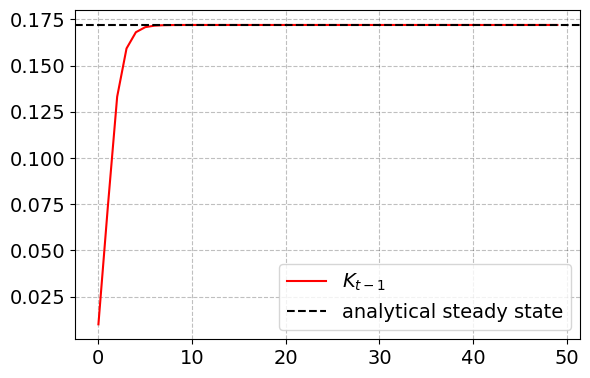

In [148]:
# a. call the class and set par and sim 
model = OLGModelClass()
par = model.par 
sim = model.sim 

# b. set production function to cobb-douglas
par.production_function = 'cobb-douglas'

# c. government
sim.balanced_budget[:] = True

# d. initial capital stock
par.K_lag_ini = 0.01

# e. simulate model 
model.simulate()

# f. plot the model with 'plot_K' function
plot_K(model.sim.K_lag, K_ss = K_ss)

# g. save initial K_lag due to comparison 
K_lag_int = model.sim.K_lag.copy()


This is identical to the one from the lectures, hence the code is running in the right way. 

We try another starting value for capital stock, e.g. 1, which is the inital value in the class. 

simulation done in 0.04 secs


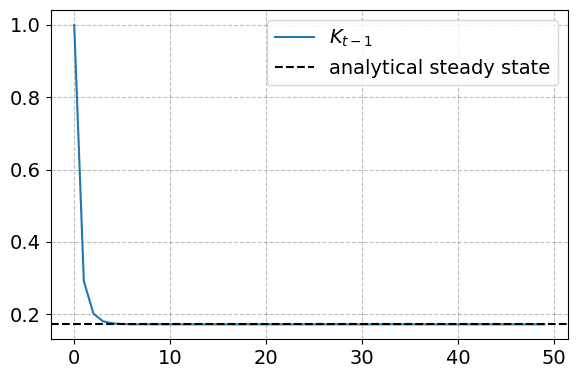

In [106]:
# a. call the class and set par and sim 
model12 = OLGModelClass()
par = model12.par 
sim = model12.sim 

# b. set production function to cobb-douglas
par.production_function = 'cobb-douglas'

# c. government
sim.balanced_budget[:] = True

# d. simulate model 
model12.simulate()

# e. plot the model with 'plot_K' function
plot_K(model12.sim.K_lag, K_ss = K_ss)

It is seen that the initial capital stock is essential. 

## Population growth

We add population growth, such $N_t = 1 + n$. 

Labor maket still clears: $L_t = N_t = 1 + n$

All other parameters are as initially. 

Futher, we set the starting value of $K_{t-1} = 0.01$ in order to be able the compare with the initial plot. 

simulation done in 0.08 secs


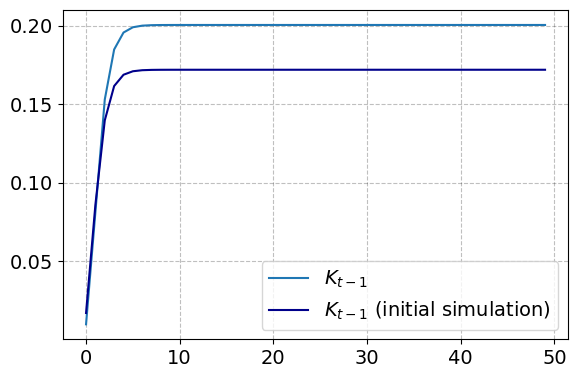

In [98]:
# a. call the class and set par and sim 
model1 = OLGModelClass()
par = model1.par
sim = model1.sim 

# b. initial capital stock
par.K_lag_ini = 0.01

# c. production
par.production_function = 'cobb-douglas'

# d. government
sim.balanced_budget[:] = True 

# e. population growth
par.n = 1.1

# f. simulate model 
model1.simulate()

# g. plot using function 
plot_K(K_lag = model1.sim.K_lag, K_lag_int = K_lag_int)

# h. save K_lag for comparison 
K_lag_pop = model1.sim.K_lag


We can see from the figure that as population increases thus the accumulated capital increases.

## Technical growth 

We further add technical growth, the production function is then the following: 

$$ Y_t = F(K_{t-1}, AL_t)$$

simulation done in 0.06 secs


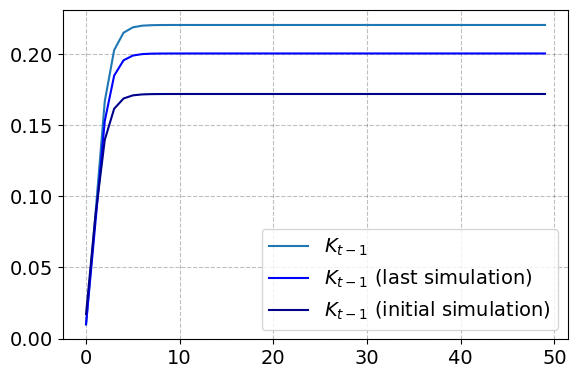

In [99]:
# a. call the class and set par and sim 
model2 = OLGModelClass()
par = model2.par
sim = model2.sim

# b. initial capital stock
par.K_lag_ini = 0.01

# c. production
par.production_function = 'cobb-douglas'

# d. government
sim.balanced_budget[:] = True # G changes to achieve this

# e. population and techological growth
par.n = 1.1
par.At = 1.1

# f. simulate model 
model2.simulate()

# g. plot function 
plot_K(K_lag = model2.sim.K_lag, K_lag_int = K_lag_int, K_lag_old = K_lag_pop)

# h. save K_lag for comparison 
K_lag_tech = model2.sim.K_lag

Intuitively, as techology increases thus the accumulated capital further increases. 

## Implementation of a PAYG scheme

We implement PAYG upon the model. Thus, the consumptions for young and old become: 

$$ 
\begin{aligned}
& C_{1t} = (1-s_{t})(1-\tau_{w})w_{t}N_{t} - d\\ 
& C_{2t+1} = (1+(1-\tau_{r})r_{t+1})S_{t} + d
\end{aligned}
$$

As initially, the labour, $L_t$, and pupulation, $N_t$, are normalized to 1. 


simulation done in 0.04 secs


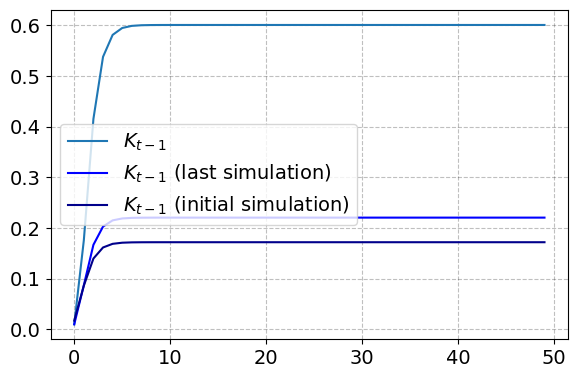

In [102]:
# a. call the class and set par and sim 
model3 = OLGModelClass()
par = model3.par 
sim = model3.sim 

# b. initial capital stock
par.K_lag_ini = 0.01

# c. production
par.production_function = 'cobb-douglas'
par.theta = 0.0

# d. households
par.sigma = 1.0

# e. government
par.tau_w = 0.0
par.tau_r = 0.0
sim.balanced_budget[:] = True # G changes to achieve this

# f. PAYG 
par.d = 0.00000001

# g. simulate model 
model3.simulate()

# h. plot function 
plot_K(model3.sim.K_lag, K_lag_int = K_lag_int, K_lag_old = K_lag_tech)


As seen from the figure, implementing PAYG system the $K_{t-1}$ increases very much even for a very low d of 0.00000001. This could maybe be caused by a bug when implementing. 

We further try to look at the consumption of young and old before and after the PAYG. 

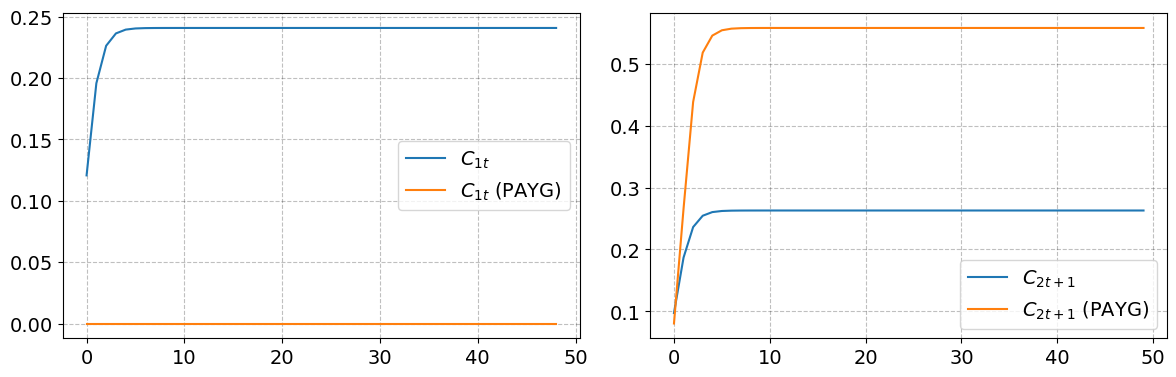

In [105]:
# a. plot consumption for old and young in PAYG compared to initial model
plot_C(model.sim.C1, model3.sim.C1, model.sim.C2, model3.sim.C2)

From the above plots, it is seen that consumption of young goes from reaching a steady state of almost 0.25 for the initial model. After implementing PAYG the consumption decreases to almost 0. 

It it further observed that the consumption of old increases from a steady state value of around 0.25 to barely 0.6. 

The young then has no consumption while the consumotion of the old increases.

## Active government

We can then add an active government, so we implement a labor income tax, $\tau_w$, of 1%. 

In [109]:
# a. call the class and set par and sim 
model4 = OLGModelClass()
par = model4.par 
sim = model4.sim 

# b. initial capital stock
par.K_lag_ini = 0.01

# c. production
par.production_function = 'cobb-douglas'
par.theta = 0.0

# d. households
par.sigma = 1.0

# e. government
par.tau_w = 0.0
par.tau_r = 0.0
sim.balanced_budget[:] = True # G changes to achieve this

# f. labour income tax
par.tau_w = 0.01

# g. simulate model 
model4.simulate()

# h. save K_lag for comparison 
K_lag_tau_w = model4.sim.K_lag


simulation done in 0.05 secs


We implement a capital income tax, $\tau_r$, of 1% for comparison. 

simulation done in 0.07 secs


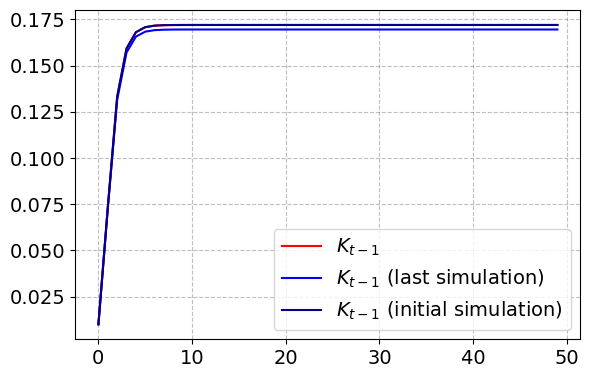

In [149]:
# a. call the class and set par and sim 
model5 = OLGModelClass()
par = model5.par 
sim = model5.sim 

# b. initial capital stock
par.K_lag_ini = 0.01

# c. production
par.production_function = 'cobb-douglas'
par.theta = 0.0

# d. households
par.sigma = 1.0

# e. government
par.tau_w = 0.0
par.tau_r = 0.0
sim.balanced_budget[:] = True # G changes to achieve this

# f. capital income tax
par.tau_r = 0.01

# g. simulate model 
model5.simulate()

# h. plot function 
plot_K(model5.sim.K_lag, K_lag_int = K_lag_int, K_lag_old = K_lag_tau_w)

# i. save K_lag for comparison 
K_lag_tau_r = model5.sim.K_lag

From the above we see that the capital income tax does not have much effect on the accumulated capital.

We can try to look at how the different taxes effect consumption.

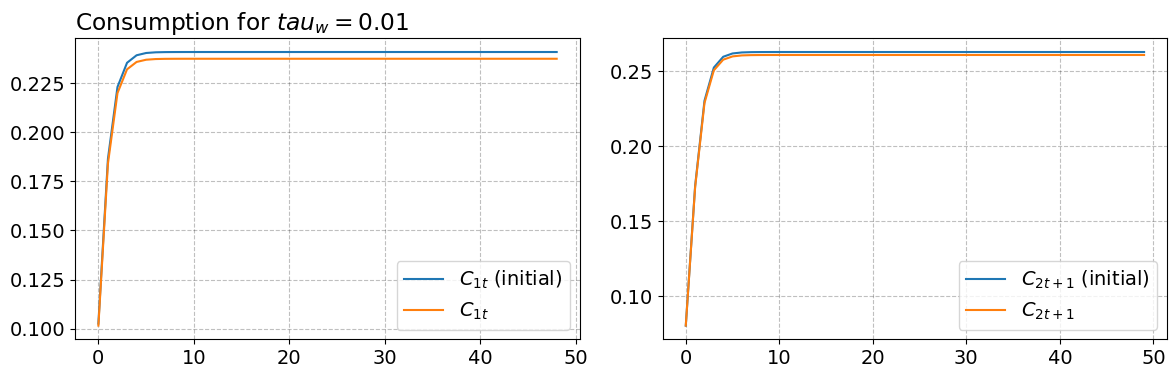

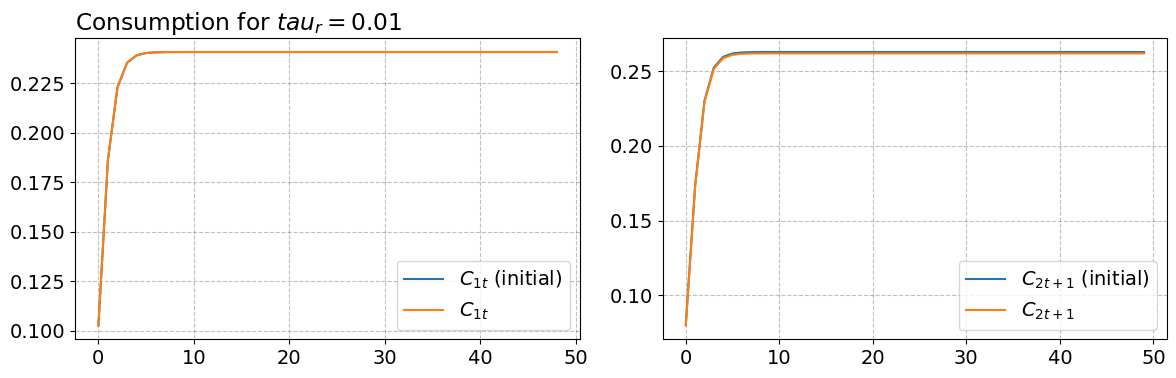

In [151]:
# a. plot consumption for old and young in with tau_w compared to initial model
plot_C(model.sim.C1, model4.sim.C1, model.sim.C2, model4.sim.C2, title = 'Consumption for $tau_w = 0.01$')

# b. plot consumption for old and young in with tau_r compared to initial model
plot_C(model.sim.C1, model5.sim.C1, model.sim.C2, model5.sim.C2, title = 'Consumption for $tau_r = 0.01$')


We see that when the government implements a labor income tax it effects the consumption of the young more negative than the old. 

Looking at the effect of a capital income tax on the consumption we see that it has no effect on the young, but a very small negative effect on the old. 

# Conclusion